In [913]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

In [915]:
%matplotlib inline

In [917]:
matches = pd.read_csv('matches.csv', low_memory=False)

I have decided to explore the Major League Soccer's 'matches' dataset, which contains information about matches between 1996 and 2022. 
As a soccer fan, I am excited to explore the growth of MLS in the US. It has all the details from the home team, away team, date of 
the match, the year it was played, the total attendance in that match, the venue it was played, the scoreline of the match, who refereed the game, and other important information like goal-scoring times for both home and away teams, the squad who played the game and who were present in the substation bench in that match.

When I went through this dataset, the first thing that came to my mind was how MLS has progressed over the years. The key attribute that can help me determine this is the average attendance in each season of the competition and how it has progressed. Another key question I was interested in was to determine which team had the most supporters attending the matches in their venues. It can help me kind of predict which teams have a big fanbase. 

In [919]:
matches

,id,home,away,date,year,time (utc),attendance,venue,league,part_of_competition,...,away_offsides,home_wonCorners,away_wonCorners,home_saves,away_saves,away_bench_14_num,away_bench_14,away_bench_14_minute,home_formation,away_formation
0,NaN,New England,San Jose,7/31/1996,1996,NaN,"12,871",Foxboro Stadium,1996 MLS,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Dallas,Colorado,6/15/1996,1996,NaN,"9,704",Cotton Bowl,1996 MLS,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Colorado,D.C. United,8/29/1996,1996,NaN,"6,368",Mile High Stadium,1996 MLS,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,LA Galaxy,New England,8/8/1996,1996,NaN,"10,251",Rose Bowl,1996 MLS,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,New England,D.C. United,7/20/1996,1996,NaN,"18,347",Foxboro Stadium,1996 MLS,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7284,623441.0,Chicago Fire FC,Seattle Sounders FC,"Saturday, July 16",2022,00:00,"13,601","Soldier Field, Chicago",2022 Major League Soccer,Regular Season,...,3.0,6.0,10.0,2.0,4.0,NaN,NaN,NaN,4-2-3-1,4-2-3-1
7285,623442.0,Inter Miami CF,Charlotte FC,"Saturday, July 16",2022,00:00,"12,274","DRV PNK Stadium, Fort Lauderdale, FL",2022 Major League Soccer,Regular Season,...,0.0,7.0,4.0,1.0,3.0,NaN,NaN,NaN,4-2-3-1,4-1-4-1
7286,623443.0,Minnesota United FC,D.C. United,"Saturday, July 16",2022,00:00,"19,718","Allianz Field, Minnesota",2022 Major League Soccer,Regular Season,...,1.0,6.0,4.0,0.0,3.0,NaN,NaN,NaN,4-2-3-1,4-4-2
7287,623445.0,Colorado Rapids,LA Galaxy,"Saturday, July 16",2022,01:00,"17,975","Dick's Sporting Goods Park, Commerce City, CO",2022 Major League Soccer,Regular Season,...,1.0,5.0,6.0,2.0,2.0,NaN,NaN,NaN,4-1-4-1,4-4-2


In [921]:
matches = matches.drop_duplicates()
matches

,id,home,away,date,year,time (utc),attendance,venue,league,part_of_competition,...,away_offsides,home_wonCorners,away_wonCorners,home_saves,away_saves,away_bench_14_num,away_bench_14,away_bench_14_minute,home_formation,away_formation
0,NaN,New England,San Jose,7/31/1996,1996,NaN,"12,871",Foxboro Stadium,1996 MLS,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Dallas,Colorado,6/15/1996,1996,NaN,"9,704",Cotton Bowl,1996 MLS,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Colorado,D.C. United,8/29/1996,1996,NaN,"6,368",Mile High Stadium,1996 MLS,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,LA Galaxy,New England,8/8/1996,1996,NaN,"10,251",Rose Bowl,1996 MLS,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,New England,D.C. United,7/20/1996,1996,NaN,"18,347",Foxboro Stadium,1996 MLS,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7284,623441.0,Chicago Fire FC,Seattle Sounders FC,"Saturday, July 16",2022,00:00,"13,601","Soldier Field, Chicago",2022 Major League Soccer,Regular Season,...,3.0,6.0,10.0,2.0,4.0,NaN,NaN,NaN,4-2-3-1,4-2-3-1
7285,623442.0,Inter Miami CF,Charlotte FC,"Saturday, July 16",2022,00:00,"12,274","DRV PNK Stadium, Fort Lauderdale, FL",2022 Major League Soccer,Regular Season,...,0.0,7.0,4.0,1.0,3.0,NaN,NaN,NaN,4-2-3-1,4-1-4-1
7286,623443.0,Minnesota United FC,D.C. United,"Saturday, July 16",2022,00:00,"19,718","Allianz Field, Minnesota",2022 Major League Soccer,Regular Season,...,1.0,6.0,4.0,0.0,3.0,NaN,NaN,NaN,4-2-3-1,4-4-2
7287,623445.0,Colorado Rapids,LA Galaxy,"Saturday, July 16",2022,01:00,"17,975","Dick's Sporting Goods Park, Commerce City, CO",2022 Major League Soccer,Regular Season,...,1.0,5.0,6.0,2.0,2.0,NaN,NaN,NaN,4-1-4-1,4-4-2


In [923]:
df_matches = matches

# Checking the data types of different attributes. 

In [925]:
print(df_matches.dtypes)

id                      float64
home                     object
away                     object
date                     object
year                      int64
                         ...   
away_bench_14_num       float64
away_bench_14            object
away_bench_14_minute     object
home_formation           object
away_formation           object
Length: 209, dtype: object


In [927]:
print(df_matches['attendance'].dtype)

object


# After exploring the attributes, I have decided to explore the following questions:
    - How average attendance of each team has increased over the years?
    - How has popularity of MLS grown over the year? Has its quality increased or decreased?

I looked into the data types of the attributes, and I have encountered a few issues with the 
dataset. The first thing  I noticed is that over the years, few teams have changed their names. 
I have to make sure their name is consistent throughout the dataset. Another issue is attendance is an 
object datatype. And also there is ',' in the data. Let first replace the ',' with an empty string. 
Then later we will convert the attendance into an integer or double datatype in order to carry out 
visualization. 

Also, to have the team's name consistent throughout the dataset, we will replace names with the ones
we will use. There was so many issues with names. Some teams like columbus there are three different names: 'Columbus'
'Columbus Crew' and 'Columbus Crew SC'

In [930]:
df_matches["attendance"]= df_matches["attendance"].str.replace(',' , '')

In [932]:
df_matches["home"]= matches["home"].str.replace('New England Revolution','New England')
df_matches['home'] = df_matches['home'].replace({'Dallas': 'FC Dallas'})
df_matches['home'] = df_matches['home'].replace({'DC United': 'D.C. United'})
df_matches['home'] = df_matches['home'].replace({'San Jose Earthquakes': 'San Jose'})
df_matches['home'] = df_matches['home'].replace({'Colorado Rapids': 'Colorado'})
df_matches['home'] = df_matches['home'].replace({'Columbus Crew SC': 'Columbus Crew'})
df_matches['home'] = df_matches['home'].replace({'Columbus': 'Columbus Crew'})


In [934]:
df_matches

,id,home,away,date,year,time (utc),attendance,venue,league,part_of_competition,...,away_offsides,home_wonCorners,away_wonCorners,home_saves,away_saves,away_bench_14_num,away_bench_14,away_bench_14_minute,home_formation,away_formation
0,NaN,New England,San Jose,7/31/1996,1996,NaN,12871,Foxboro Stadium,1996 MLS,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,FC Dallas,Colorado,6/15/1996,1996,NaN,9704,Cotton Bowl,1996 MLS,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Colorado,D.C. United,8/29/1996,1996,NaN,6368,Mile High Stadium,1996 MLS,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,LA Galaxy,New England,8/8/1996,1996,NaN,10251,Rose Bowl,1996 MLS,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,New England,D.C. United,7/20/1996,1996,NaN,18347,Foxboro Stadium,1996 MLS,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7284,623441.0,Chicago Fire FC,Seattle Sounders FC,"Saturday, July 16",2022,00:00,13601,"Soldier Field, Chicago",2022 Major League Soccer,Regular Season,...,3.0,6.0,10.0,2.0,4.0,NaN,NaN,NaN,4-2-3-1,4-2-3-1
7285,623442.0,Inter Miami CF,Charlotte FC,"Saturday, July 16",2022,00:00,12274,"DRV PNK Stadium, Fort Lauderdale, FL",2022 Major League Soccer,Regular Season,...,0.0,7.0,4.0,1.0,3.0,NaN,NaN,NaN,4-2-3-1,4-1-4-1
7286,623443.0,Minnesota United FC,D.C. United,"Saturday, July 16",2022,00:00,19718,"Allianz Field, Minnesota",2022 Major League Soccer,Regular Season,...,1.0,6.0,4.0,0.0,3.0,NaN,NaN,NaN,4-2-3-1,4-4-2
7287,623445.0,Colorado,LA Galaxy,"Saturday, July 16",2022,01:00,17975,"Dick's Sporting Goods Park, Commerce City, CO",2022 Major League Soccer,Regular Season,...,1.0,5.0,6.0,2.0,2.0,NaN,NaN,NaN,4-1-4-1,4-4-2


In [936]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7289 entries, 0 to 7288
Columns: 209 entries, id to away_formation
dtypes: float64(83), int64(3), object(123)
memory usage: 11.6+ MB


In [938]:
print(df_matches['year'].dtype)

int64


# After removing the coma, let's convert attendance datatype to Int64. 

In [940]:
df_matches['attendance'] = pd.to_numeric(df_matches['attendance'], errors='coerce').astype('Int64')

In [942]:
print(df_matches['attendance'].dtype)

Int64


In [944]:
df_matches.describe()

,id,year,attendance,home_score,away_score,home_starting_1_num,home_starting_2_num,home_starting_3_num,home_starting_4_num,home_starting_5_num,...,away_yellowCards,home_redCards,away_redCards,home_offsides,away_offsides,home_wonCorners,away_wonCorners,home_saves,away_saves,away_bench_14_num
count,6316.000000,7289.000000,4877.0,7289.000000,7289.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,...,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000,1.0
mean,378633.848005,2011.271642,19158.919008,1.704623,1.154754,15.282526,14.355900,15.562216,16.140507,16.074319,...,1.844189,0.094041,0.127500,2.126312,1.888933,5.490596,4.282320,2.906751,3.630766,3.0
std,162842.383385,7.575871,9249.739518,1.263514,1.081442,15.959246,13.322868,15.212209,16.733487,14.692123,...,1.202668,0.315391,0.362579,1.739774,1.647482,2.856305,2.495755,1.914048,2.197495,NaN
min,13690.000000,1996.000000,16.0,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
25%,262036.750000,2005.000000,14020.0,1.000000,0.000000,1.000000,4.000000,4.000000,4.000000,5.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000,3.0
50%,384795.500000,2013.000000,18133.0,2.000000,1.000000,18.000000,12.000000,13.000000,13.000000,14.000000,...,2.000000,0.000000,0.000000,2.000000,2.000000,5.000000,4.000000,3.000000,3.000000,3.0
75%,502682.250000,2018.000000,21188.0,2.000000,2.000000,24.000000,23.000000,23.000000,22.000000,23.000000,...,3.000000,0.000000,0.000000,3.000000,3.000000,7.000000,6.000000,4.000000,5.000000,3.0
max,623484.000000,2022.000000,92216.0,7.000000,8.000000,99.000000,98.000000,99.000000,96.000000,99.000000,...,7.000000,3.000000,3.000000,12.000000,15.000000,17.000000,22.000000,14.000000,16.000000,3.0


In [946]:
df_matches.isnull().sum()

id                       973
home                       0
away                       0
date                       0
year                       0
                        ... 
away_bench_14_num       7288
away_bench_14           7288
away_bench_14_minute    7288
home_formation          3264
away_formation          3264
Length: 209, dtype: int64

# It means there are so many missing values. 

In [948]:
df_matches['attendance'].isnull().sum()

2412

There are so many null values for attendance. What should we do? Maybe fill it with overall mean? or mean of the previous year.

In [951]:
df_matches.columns

Index(['id', 'home', 'away', 'date', 'year', 'time (utc)', 'attendance',
       'venue', 'league', 'part_of_competition',
       ...
       'away_offsides', 'home_wonCorners', 'away_wonCorners', 'home_saves',
       'away_saves', 'away_bench_14_num', 'away_bench_14',
       'away_bench_14_minute', 'home_formation', 'away_formation'],
      dtype='object', length=209)

In [953]:
df_matches['year'].value_counts()

year
2021    472
2019    421
2018    408
2017    391
2016    357
2015    357
2014    338
2013    338
2012    338
2020    324
2011    319
2022    281
2010    251
2009    236
2008    222
2000    209
1999    208
2007    206
1998    206
2005    203
2006    202
1996    177
2001    176
1997    173
2003    161
2004    158
2002    157
Name: count, dtype: int64

/***********
  This code was adapted from:
  pandas.pydata.org
  https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
  Accessed: Oct.7
*************/

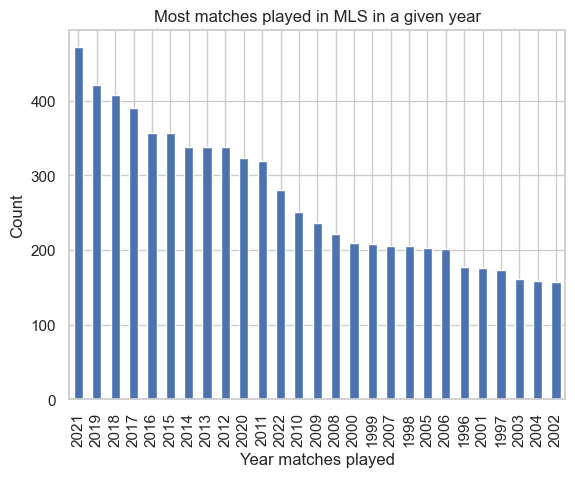

In [955]:
bar_matches = df_matches['year'].value_counts(dropna = False) \
.plot(kind='bar', title = 'Most matches played in MLS in a given year')
bar_matches.set_xlabel('Year matches played')
bar_matches.set_ylabel('Count')
plt.show()

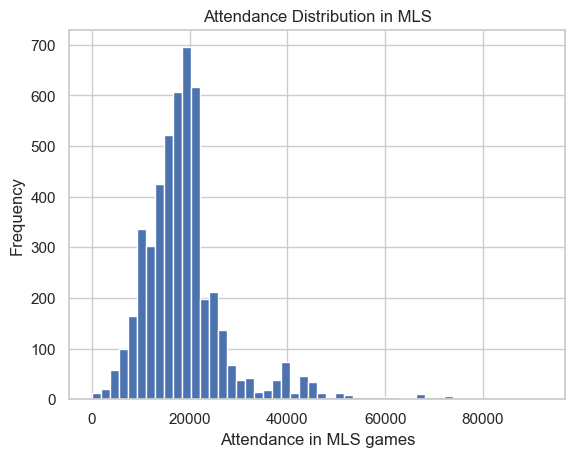

In [957]:
hist_matches = df_matches['attendance'].plot(kind='hist', 
                                   bins=50, 
                                   title = 'Attendance Distribution in MLS')
hist_matches.set_xlabel('Attendance in MLS games')
plt.show()

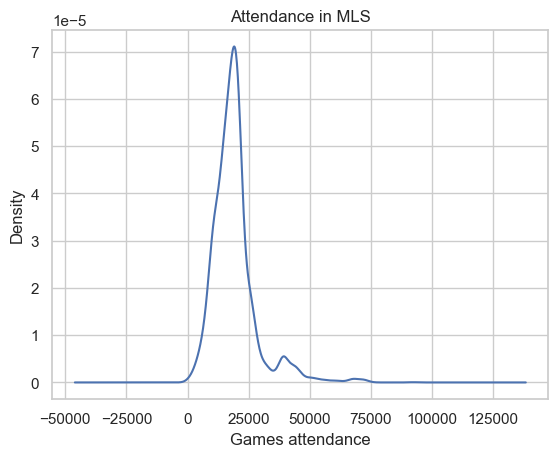

In [959]:
kde_matches = df_matches['attendance'].plot(kind='kde', 
                          title = 'Attendance in MLS')
kde_matches.set_xlabel('Games attendance')
plt.show()

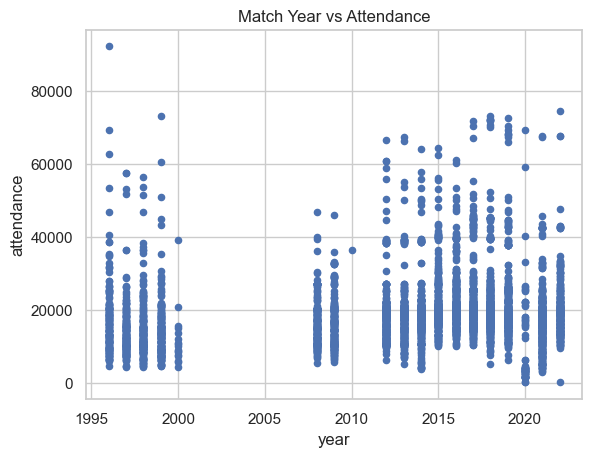

In [961]:
df_matches.plot(kind='scatter',
            x = 'year',
            y = 'attendance',
            title = 'Match Year vs Attendance')
plt.show()

The above graph helps to see attendance data for so many years are missing. Now let's see scatterplot
for different teams and their attendance at their home games. 

/***********
  The below code (MaxNlocator part) was adapted from:
  Matplotlib.org
  https://matplotlib.org/stable/api/ticker_api.html
  Accessed: Oct. 12
*************/

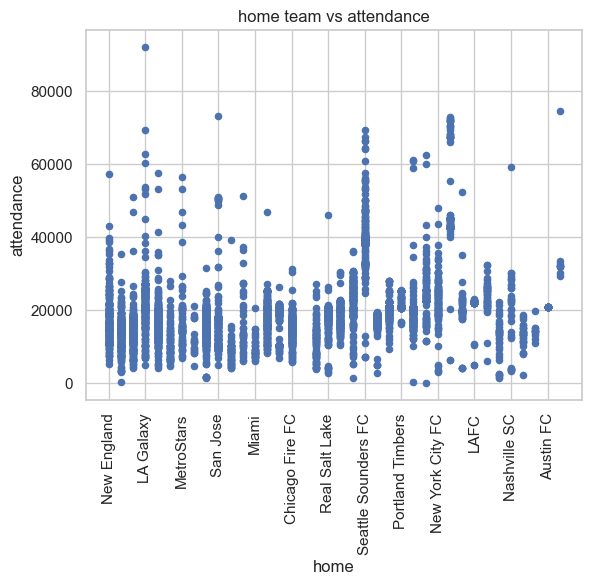

In [964]:
df_matches.plot(kind='scatter',
            x = 'home',
            y = 'attendance',
            title = 'home team vs attendance')
plt.xticks(rotation = 90)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune='both', nbins=14))
plt.show()

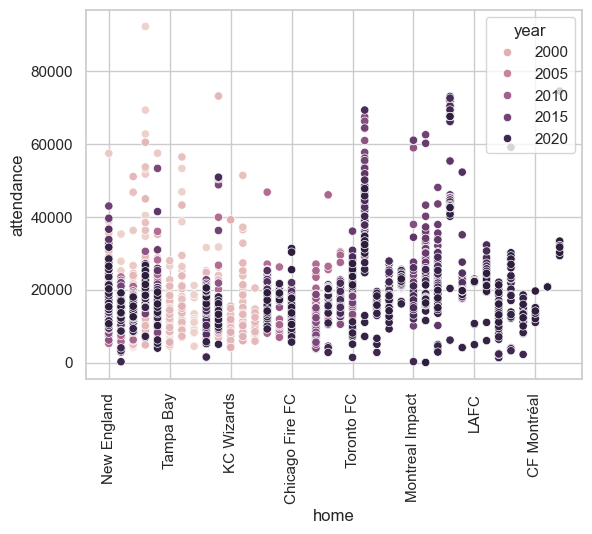

In [966]:
sns.scatterplot(x = 'home',
            y = 'attendance',
                hue = 'year',
               data = df_matches)
plt.xticks(rotation = 90)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune='both', nbins=10))
plt.show()

In [968]:
matches_corr = df_matches[['attendance', 'year']].dropna().corr()

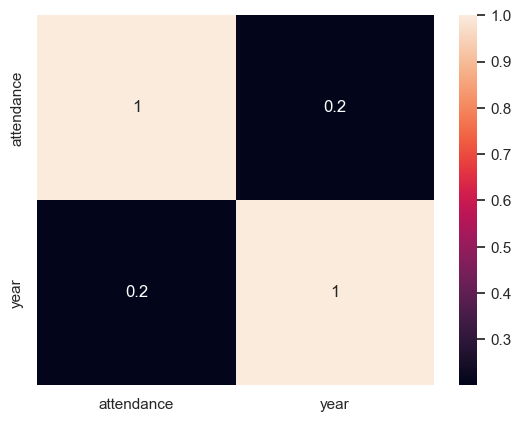

In [970]:
sns.heatmap(matches_corr, annot = True)
plt.show()

What are the venues with most number of fans attending or most number of mls games played? 

In [973]:
df_matches['venue'].value_counts()

venue
Dignity Health Sports Park, Los Angeles    356
MAPFRE Stadium, Columbus                   290
SeatGeek Stadium                           232
Dick's Sporting Goods Park, Denver         225
Rio Tinto Stadium, Utah                    186
                                          ... 
Rogers Centere                               1
FedExField                                   1
Levi's Stadium                               1
Toyota Field                                 1
Stanford, Palo Alto                          1
Name: count, Length: 123, dtype: int64

/* -----
The below code was written with the aid of ChatGPT;
when prompted 'How to find mean and count for attendance in each venue and graph it barh?'
the generated text helped me write the following code:
accessed: Oct 10
 -------- */

/var/folders/95/36zb2rc13_51f2jz0fbg4knh0000gn/T/ipykernel_1349/844196042.py:4: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('count >= 10') \


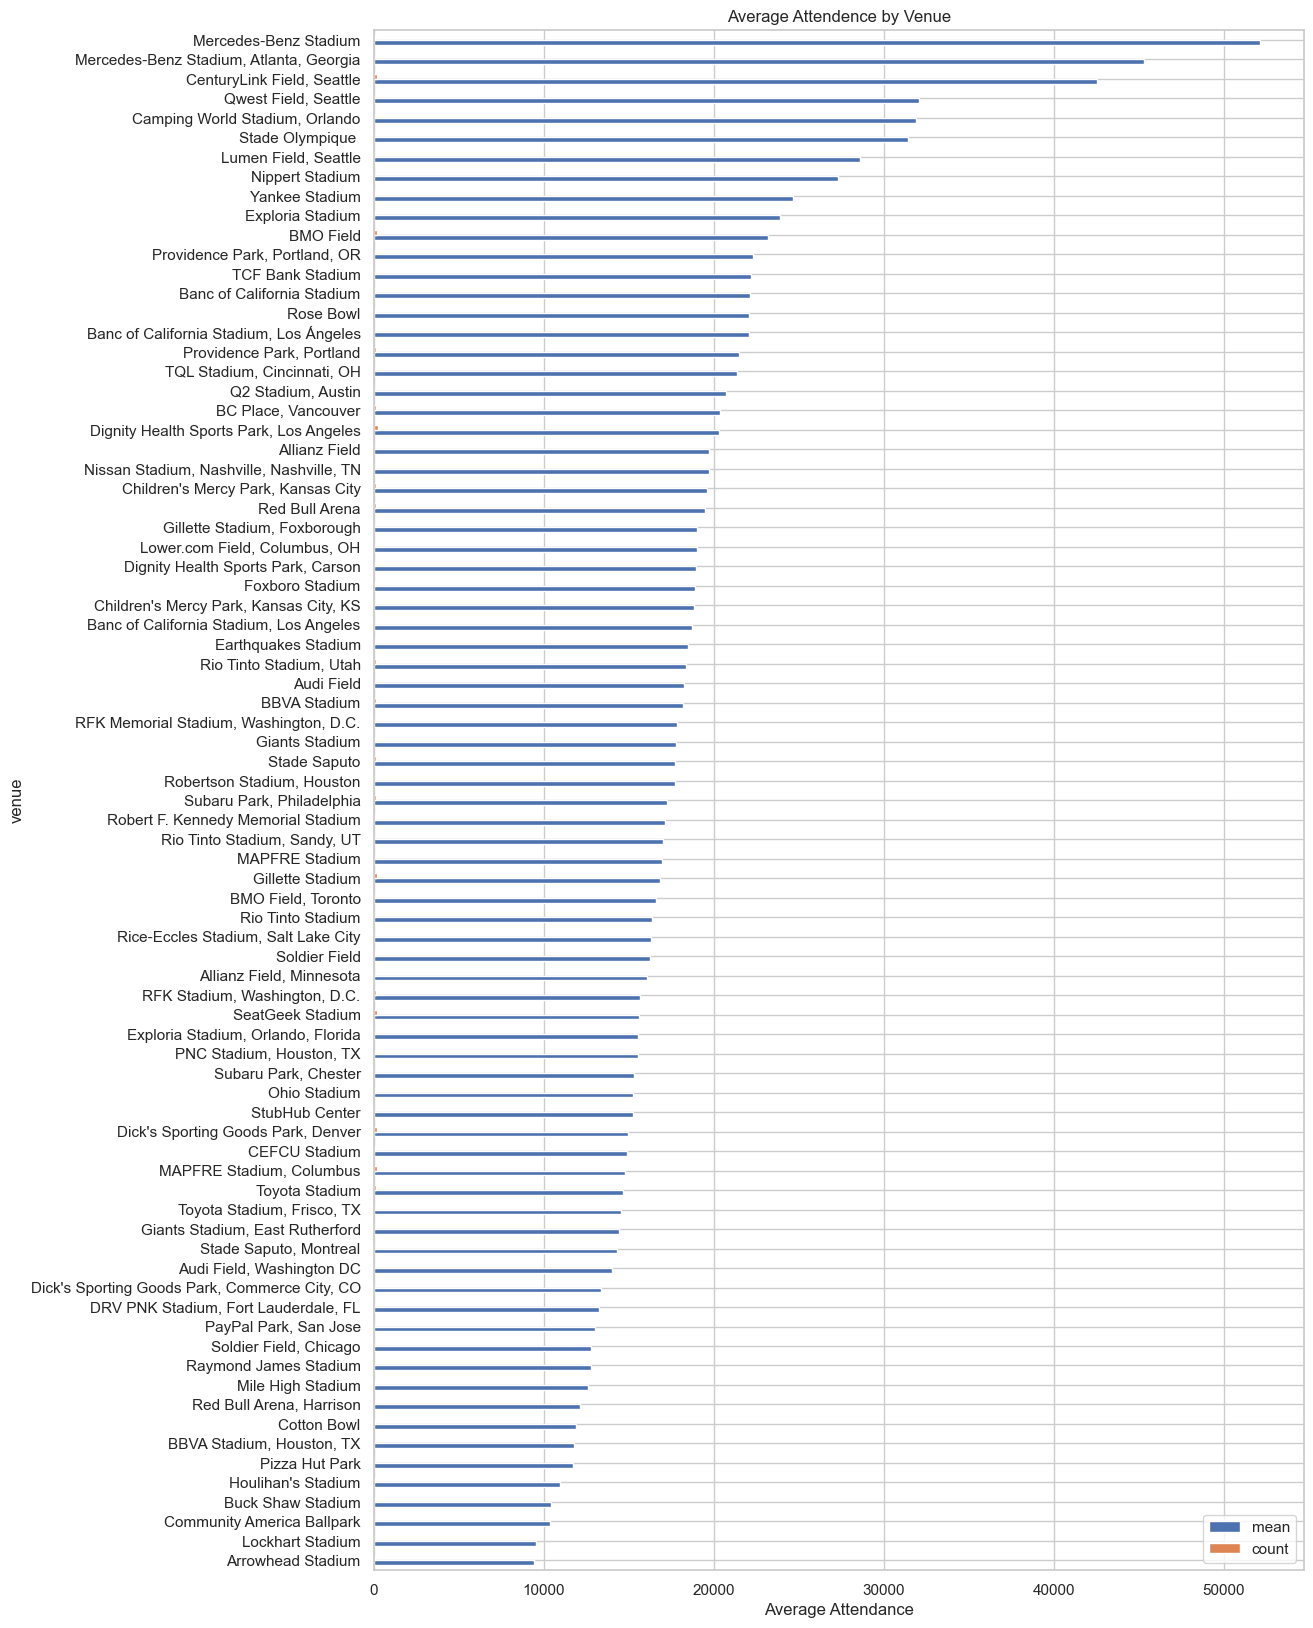

In [975]:
barh_matches = df_matches.query('venue != "Other"') \
    .groupby('venue')['attendance'] \
    .agg(['mean', 'count']) \
    .query('count >= 10') \
    .sort_values('mean') \
    .plot(kind = 'barh', figsize = (12, 20), title = 'Average Attendence by Venue')
barh_matches.set_xlabel('Average Attendance')
plt.show()

In [976]:
df1 = df_matches.transpose()

In [979]:
df1

,0,1,2,3,4,5,6,7,8,9,...,7279,7280,7281,7282,7283,7284,7285,7286,7287,7288
id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,623437.0,623436.0,623438.0,623439.0,623440.0,623441.0,623442.0,623443.0,623445.0,623444.0
home,New England,FC Dallas,Colorado,LA Galaxy,New England,D.C. United,Tampa Bay,LA Galaxy,D.C. United,MetroStars,...,Colorado,FC Dallas,LA Galaxy,CF Montréal,Philadelphia Union,Chicago Fire FC,Inter Miami CF,Minnesota United FC,Colorado,FC Dallas
away,San Jose,Colorado,D.C. United,New England,D.C. United,Colorado,Columbus,Dallas,Columbus,KC Wiz,...,Orlando City SC,New York City FC,San Jose Earthquakes,Toronto FC,New England Revolution,Seattle Sounders FC,Charlotte FC,D.C. United,LA Galaxy,Austin FC
date,7/31/1996,6/15/1996,8/29/1996,8/8/1996,7/20/1996,9/21/1996,6/22/1996,8/25/1996,7/28/1996,6/26/1996,...,"Wednesday, July 13","Wednesday, July 13","Wednesday, July 13","Saturday, July 16","Saturday, July 16","Saturday, July 16","Saturday, July 16","Saturday, July 16","Saturday, July 16","Saturday, July 16"
year,1996,1996,1996,1996,1996,1996,1996,1996,1996,1996,...,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
away_bench_14_num,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
away_bench_14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
away_bench_14_minute,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_formation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4-1-4-1,4-2-3-1,4-4-1-1,3-4-1-2,4-2-3-1,4-2-3-1,4-2-3-1,4-2-3-1,4-1-4-1,4-3-3


# Let make a subset of matches with only first 9 colums

In [981]:
subset_matches = df_matches.iloc[:, :9]

In [983]:
print(subset_matches.head())

   id         home         away       date  year time (utc)  attendance  \
0 NaN  New England     San Jose  7/31/1996  1996        NaN       12871   
1 NaN    FC Dallas     Colorado  6/15/1996  1996        NaN        9704   
2 NaN     Colorado  D.C. United  8/29/1996  1996        NaN        6368   
3 NaN    LA Galaxy  New England   8/8/1996  1996        NaN       10251   
4 NaN  New England  D.C. United  7/20/1996  1996        NaN       18347   

               venue    league  
0    Foxboro Stadium  1996 MLS  
1        Cotton Bowl  1996 MLS  
2  Mile High Stadium  1996 MLS  
3          Rose Bowl  1996 MLS  
4    Foxboro Stadium  1996 MLS  


Let's group by the mean of attendance by year and try to fill the empty attendance

/* -----
This code was written with the aid of ChatGPT;
when prompted 'how do I match mean year of previous year to current in missing cells?'
the generated text helped me write the following code:
accessed: Oct 5
 -------- */

In [1124]:
subset_matches['attendance'] = subset_matches['attendance'].astype('float64')
subset_matches['prev_year_mean'] = subset_matches.groupby('year')['attendance'].transform(lambda x: x.shift(1).mean())
subset_matches['prev_year_mean'] = subset_matches['year'].map(subset_matches.groupby('year')['attendance'].mean().shift())
subset_matches['attendance'].fillna(subset_matches['prev_year_mean'], inplace=True)
print(subset_matches)

            id                 home                 away               date  \
0          NaN          New England             San Jose          7/31/1996   
1          NaN            FC Dallas             Colorado          6/15/1996   
2          NaN             Colorado          D.C. United          8/29/1996   
3          NaN            LA Galaxy          New England           8/8/1996   
4          NaN          New England          D.C. United          7/20/1996   
...        ...                  ...                  ...                ...   
7284  623441.0      Chicago Fire FC  Seattle Sounders FC  Saturday, July 16   
7285  623442.0       Inter Miami CF         Charlotte FC  Saturday, July 16   
7286  623443.0  Minnesota United FC          D.C. United  Saturday, July 16   
7287  623445.0             Colorado            LA Galaxy  Saturday, July 16   
7288  623444.0            FC Dallas            Austin FC  Saturday, July 16   

      year time (utc)  attendance  \
0     1996    

/var/folders/95/36zb2rc13_51f2jz0fbg4knh0000gn/T/ipykernel_1349/2989340521.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  subset_matches['attendance'].fillna(subset_matches['prev_year_mean'], inplace=True)


In [1126]:
subset_matches.drop(columns=['prev_year_mean'], inplace=True)

In [1128]:
null_count = subset_matches['attendance'].isnull().sum()
print(f"Number of rows with null attendance: {null_count}")

Number of rows with null attendance: 134


In [1130]:
null_count = matches['attendance'].isnull().sum()
print(f"Number of rows with null attendance: {null_count}")

Number of rows with null attendance: 2412


Even mapping the attendance from the previous year I am still getting 1091 null values because there are a 
lot of years missing in consecutive years between 2000 and 2008. so filling rest with an average mean 

/* -----
This code was written with the aid of ChatGPT;
when prompted 'how to map empty data by average mean of that venue over the course of the data with that specific venue?'
the generated text helped me write the following code:
accessed: Oct 13
 -------- */

In [1133]:
mean_attendance = subset_matches.groupby('venue')['attendance'].mean()
subset_matches['attendance'] = subset_matches['attendance'].fillna(df_matches['venue'].map(mean_attendance))

In [1135]:
null_count = subset_matches['attendance'].isnull().sum()
print(f"Number of rows with null attendance: {null_count}")

Number of rows with null attendance: 116


Let's check how the pair plot looks with the new dataset with attendance filled with mean values. 

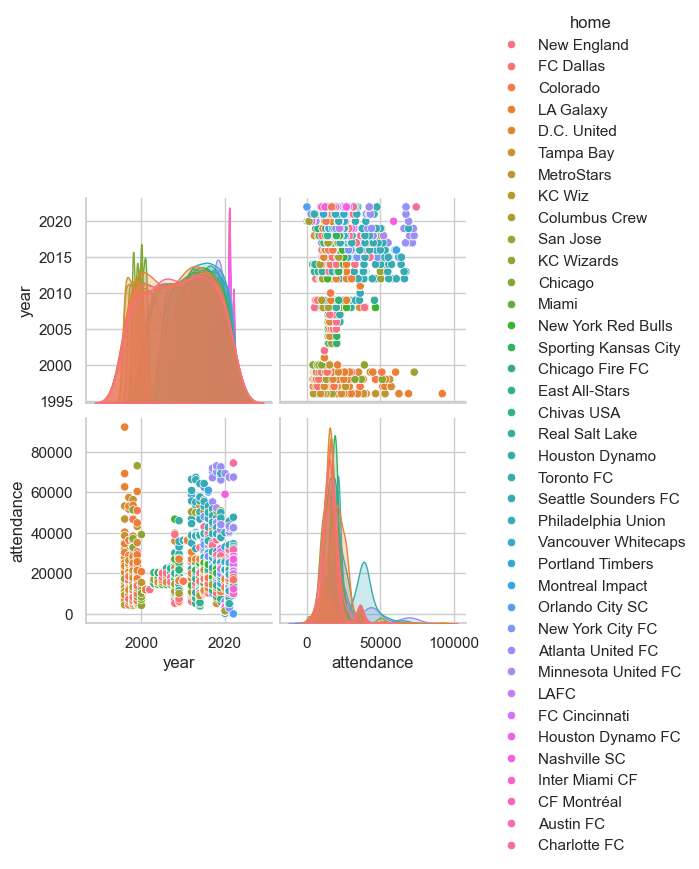

In [1138]:
sns.pairplot(subset_matches, vars=['year', 'attendance'], hue='home')
plt.show()

Too many catagories above ....

Let's create a pivot table with 'home', 'year' and 'attendance' as values and see if we see any correlations

All teams have a history dating back to 1996 (A few were acquired in later seasons. I have decided to select five teams that were part of founding teams and are still playing in the league. However, there is a small issue. Some teams names have changed over
the years. We need to make sure they are the same in all cells. The teams I work with are:
D.C. United
New England
LA Galaxy
FC Dallas 
San Jose Earthquakes (San Jose)


/* -----
The code below was written with the aid of ChatGPT;
when prompted 'how to create a pivot tame with year and team?'
the generated text helped me write the following code:
accessed: Oct 10
 -------- */

In [1143]:
aggregated_data = subset_matches.groupby(['year', 'home'])['attendance'].mean().reset_index()
attendance_pivot = aggregated_data.pivot(index='year', columns='home', values='attendance')

In [1144]:
teams = ['FC Dallas', 'New England', 'LA Galaxy', 'Colorado', 'D.C. United', 'Sporting Kansas City', 
         'New York Red Bulls', 'Columbus Crew']
teams_attendance = attendance_pivot[teams]

In [1145]:
print(teams_attendance)

home     FC Dallas   New England     LA Galaxy      Colorado   D.C. United  \
year                                                                         
1996  15338.888889  19024.500000  29028.450000  10213.312500  16296.315789   
1997   9637.166667  20999.705882  20525.647059  12273.555556  18366.421053   
1998  10781.882353  19187.750000  21316.833333  14328.058824  16343.263158   
1999  12104.105263  16734.500000  19320.250000  13588.294118  17510.631579   
2000  14016.923077  14203.276018  14731.260684  14089.511312  14420.793269   
2001  11957.529412  11957.529412  11957.529412  11957.529412  11957.529412   
2002  11957.529412  11957.529412  11957.529412  11957.529412  11957.529412   
2003           NaN  18048.159875  20327.176201  17063.680942  15664.598131   
2004  17160.861814  18048.159875  20116.088575  17160.861814  15664.598131   
2005  18723.665201  18155.590989  20327.176201  16772.685411  15664.598131   
2006  20089.351054  18161.559385  20327.176201  17299.943848  15

In [1146]:
print(teams_attendance.isnull().sum())

home
FC Dallas               1
New England             0
LA Galaxy               0
Colorado                0
D.C. United             0
Sporting Kansas City    5
New York Red Bulls      5
Columbus Crew           0
dtype: int64


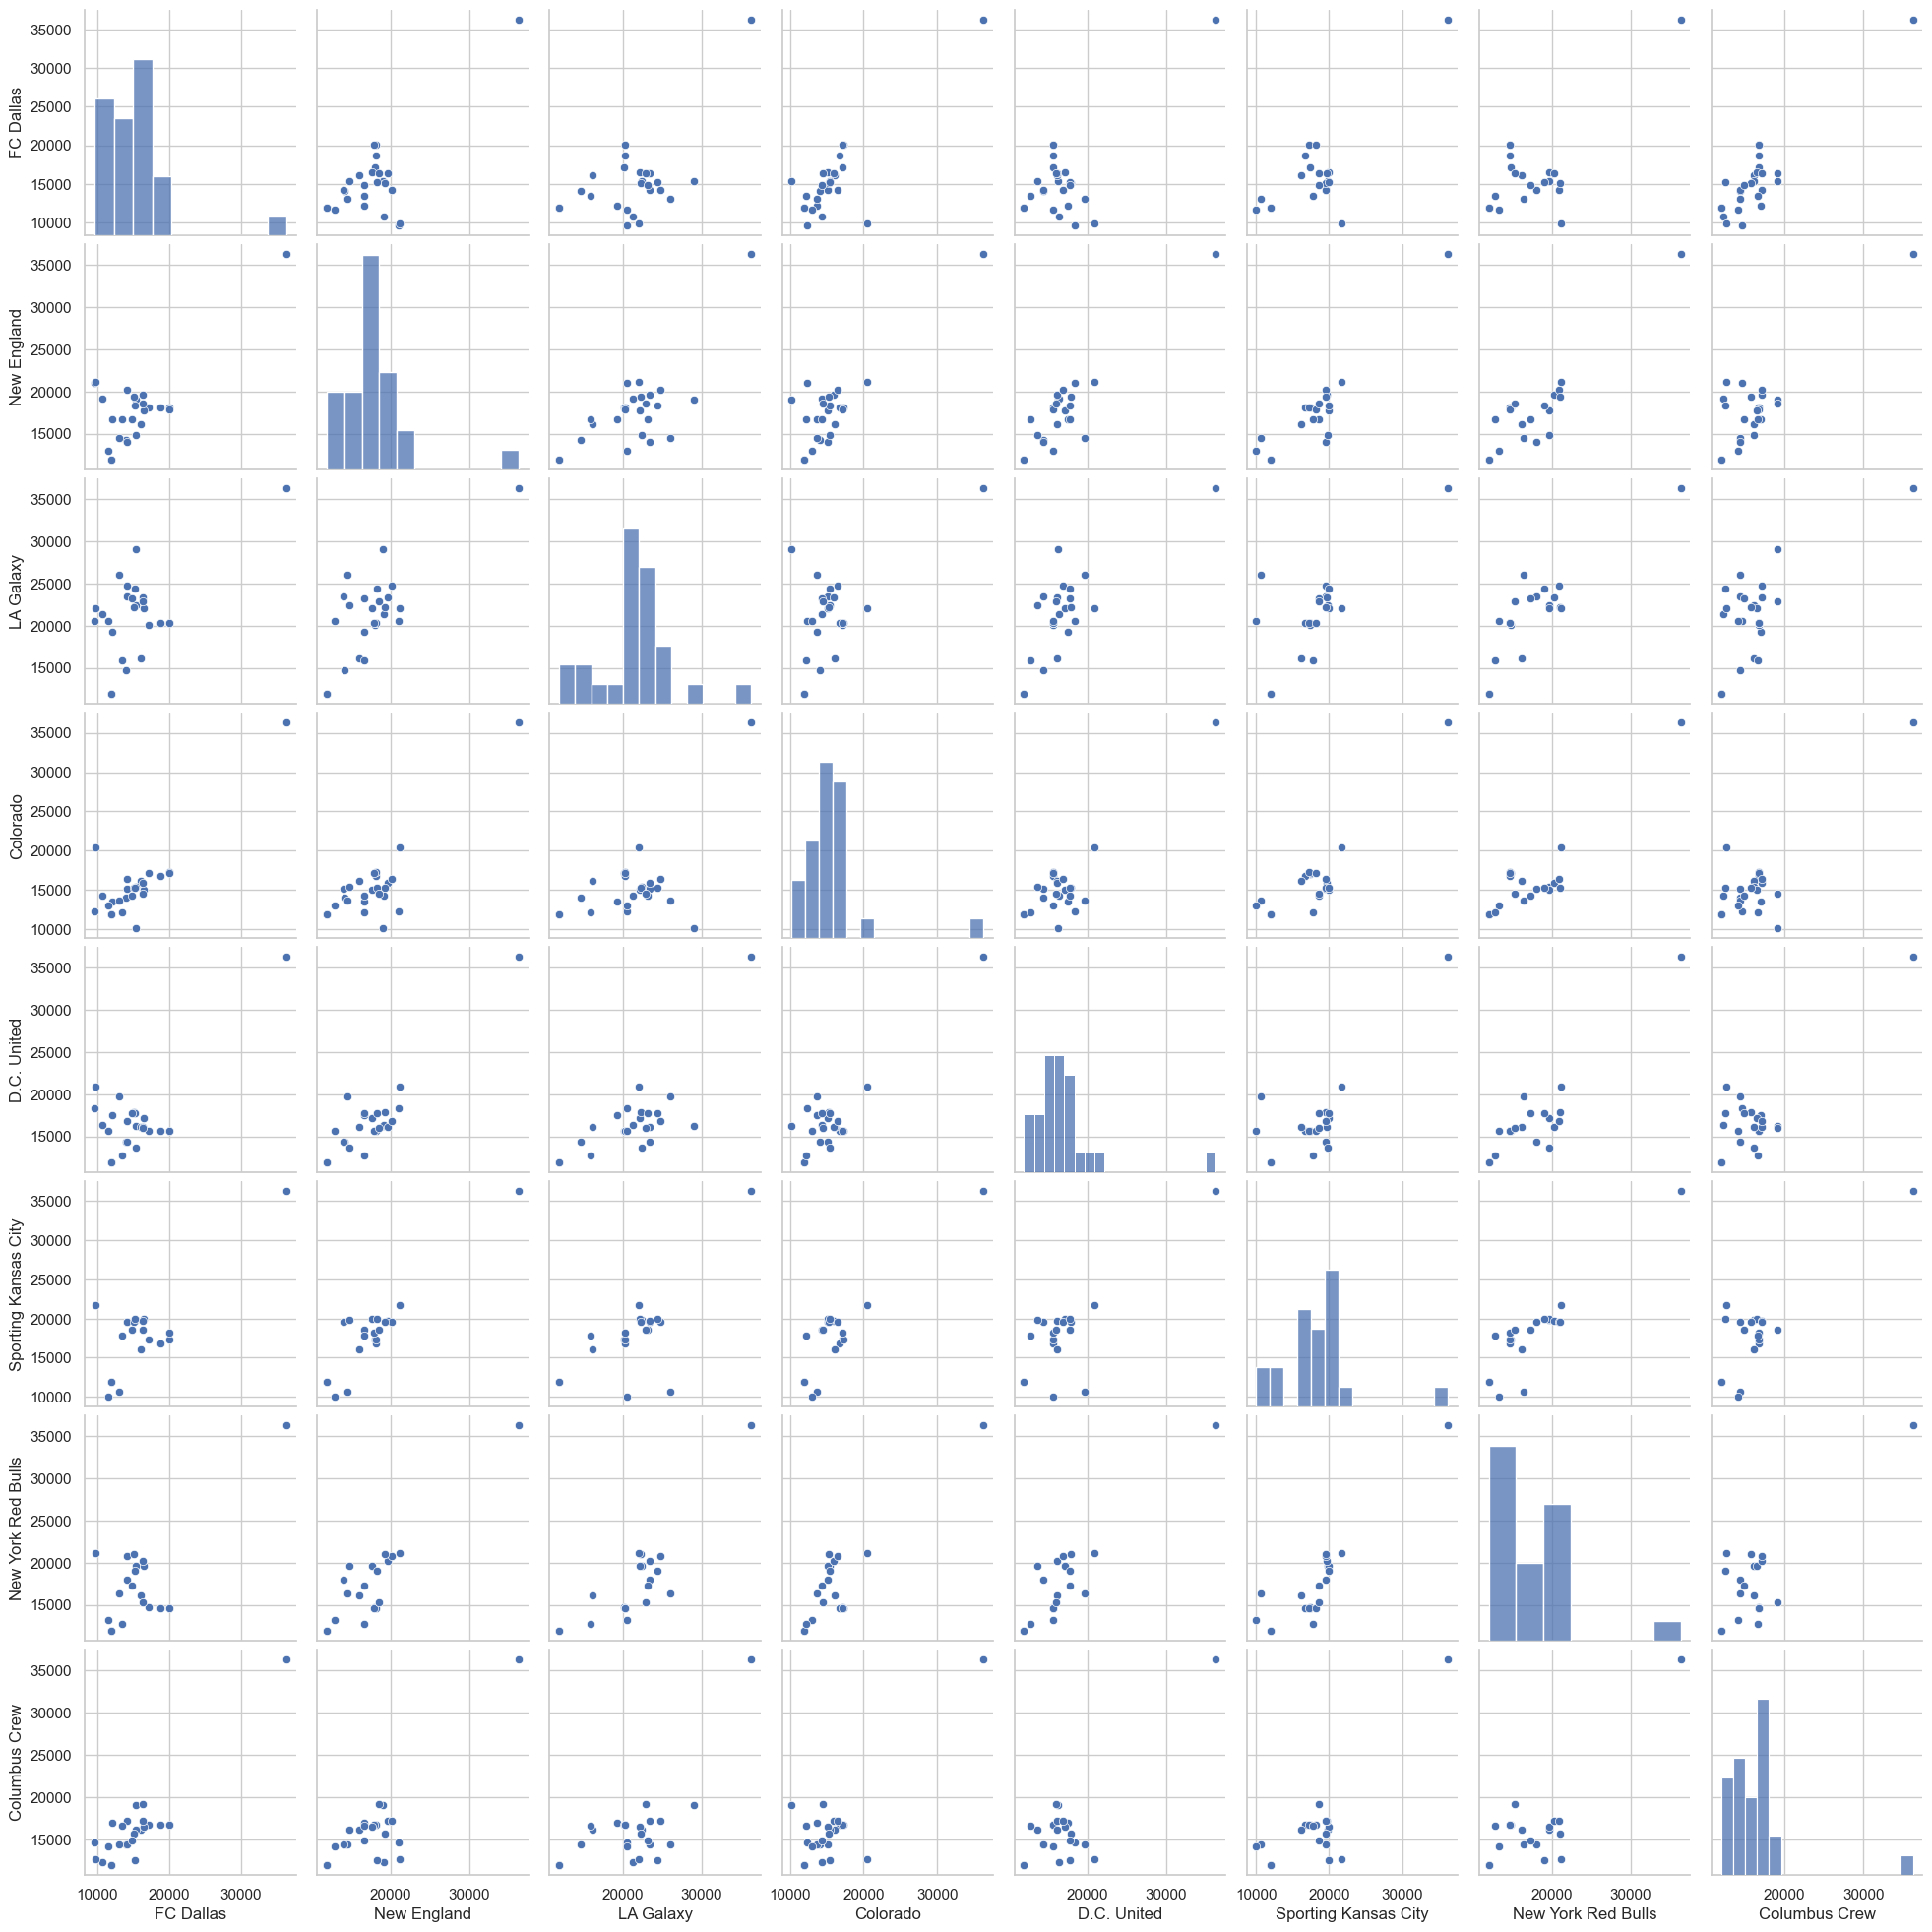

In [1148]:
sns.pairplot(teams_attendance)
plt.show()

Lets fill the null values of above teams with mean value of their attendance. 

In [1154]:
mean_attendance = teams_attendance.mean()
teams_attendance.fillna(mean_attendance, inplace=True)

/var/folders/95/36zb2rc13_51f2jz0fbg4knh0000gn/T/ipykernel_1349/1201032519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams_attendance.fillna(mean_attendance, inplace=True)


In [1155]:
print(teams_attendance)

home     FC Dallas   New England     LA Galaxy      Colorado   D.C. United  \
year                                                                         
1996  15338.888889  19024.500000  29028.450000  10213.312500  16296.315789   
1997   9637.166667  20999.705882  20525.647059  12273.555556  18366.421053   
1998  10781.882353  19187.750000  21316.833333  14328.058824  16343.263158   
1999  12104.105263  16734.500000  19320.250000  13588.294118  17510.631579   
2000  14016.923077  14203.276018  14731.260684  14089.511312  14420.793269   
2001  11957.529412  11957.529412  11957.529412  11957.529412  11957.529412   
2002  11957.529412  11957.529412  11957.529412  11957.529412  11957.529412   
2003  15388.973807  18048.159875  20327.176201  17063.680942  15664.598131   
2004  17160.861814  18048.159875  20116.088575  17160.861814  15664.598131   
2005  18723.665201  18155.590989  20327.176201  16772.685411  15664.598131   
2006  20089.351054  18161.559385  20327.176201  17299.943848  15

/***********
  The code was adapted from (melt function in pandas):
  pandas.pydata.org
  https://pandas.pydata.org/docs/reference/api/pandas.melt.html
  Also Seaborn Pydata
  https://seaborn.pydata.org/tutorial/color_palettes.html
  Accessed: Oct.12
*************/

In [1156]:
print(teams_attendance.index)

Index([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022],
      dtype='int64', name='year')


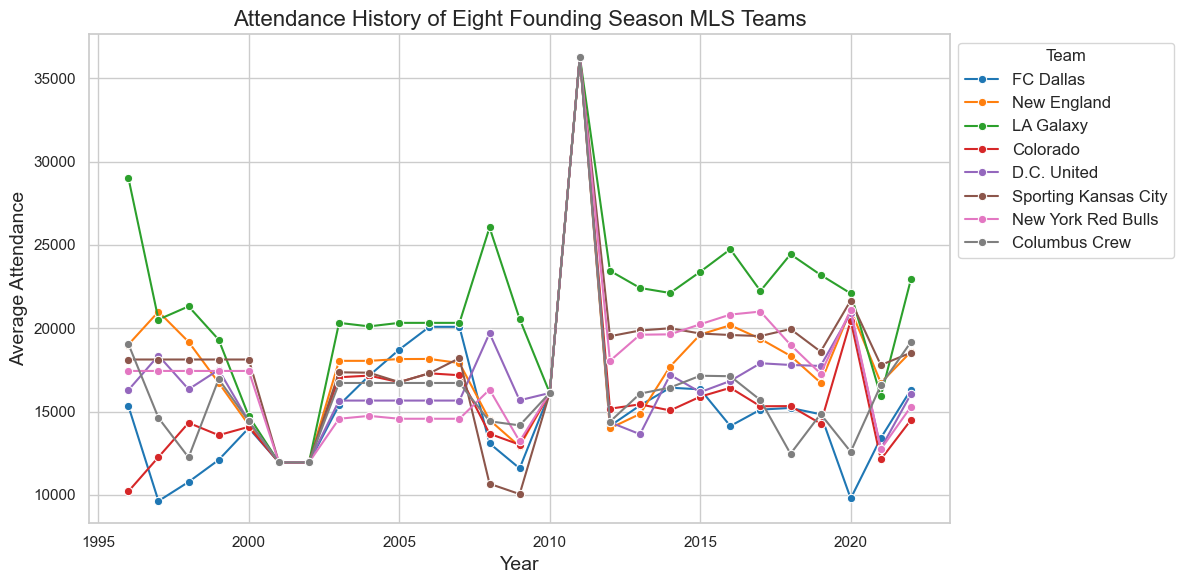

In [1157]:
teams_attendance.reset_index(inplace=True)
attendance_long = teams_attendance.melt(id_vars='year', 
                                         value_vars=teams, 
                                         var_name='team', 
                                         value_name='attendance')

plt.figure(figsize=(12, 6))
sns.lineplot(data=attendance_long, x='year', 
             y='attendance', hue='team', 
             marker='o', dashes=False, 
             palette='tab10')
plt.title('Attendance History of Eight Founding Season MLS Teams', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Attendance', fontsize=14)
plt.legend(title='Team', loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.tight_layout()
plt.show()

There is issue in 2010 and 2011 data. I applied previous year mean then for the remaining the total mean. 2011 data is same for all
teams. I am going to drop the who year data and see. 

/* ----- The below code was written with the aid of ChatGPT; 
when prompted 'How to remove multiple year data from above?'
the generated text helped me write the following code: accessed: Oct 7 -------- */


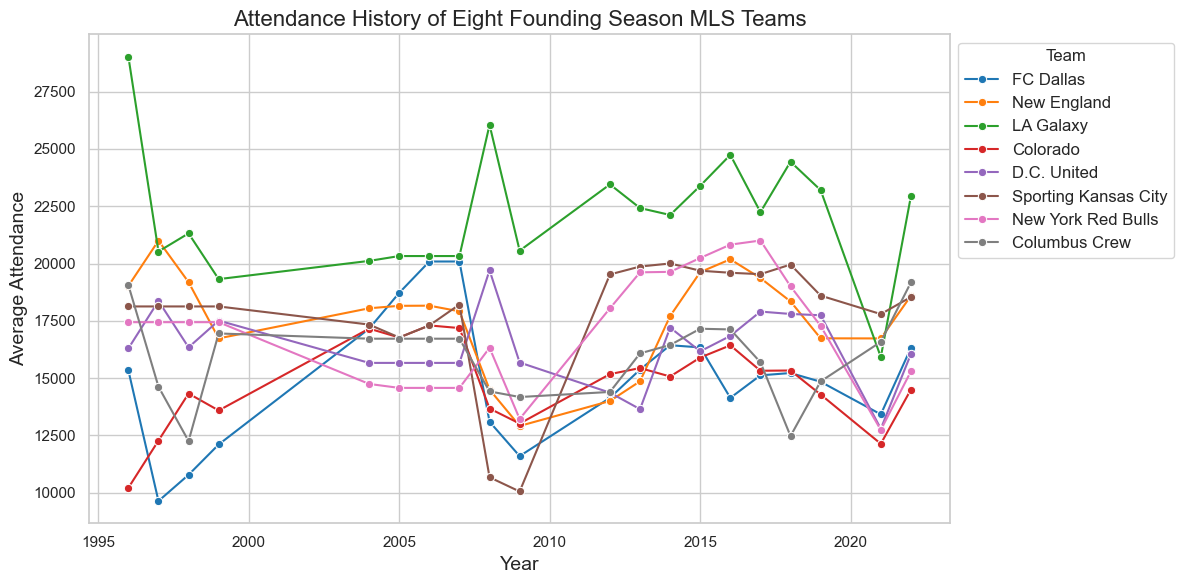

In [1186]:
teams_attendance = teams_attendance[~teams_attendance['year'].isin([2000, 2001, 2002, 2003, 2010, 2011, 2020])].reset_index(drop=True)
attendance_long = teams_attendance.melt(id_vars='year', 
                                         value_vars=teams, 
                                         var_name='team', 
                                         value_name='attendance')

plt.figure(figsize=(12, 6))
sns.lineplot(data=attendance_long, x='year', 
             y='attendance', hue='team', 
             marker='o', dashes=False, 
             palette='tab10')
plt.title('Attendance History of Eight Founding Season MLS Teams', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Attendance', fontsize=14)
plt.legend(title='Team', loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.tight_layout()
plt.show()

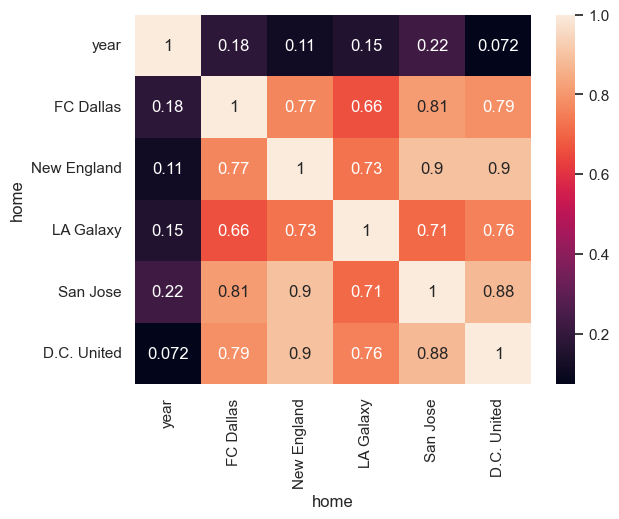

In [1165]:
df_corr = filtered_attendance_pivot.dropna().corr()
sns.heatmap(df_corr, annot = True)
plt.show()

/* -----
The below code was written with the aid of ChatGPT;
when prompted 'Ways to creatively show correlation using seaborne library in python?'
the generated text helped me write the following code:
accessed: Oct 7
 -------- */

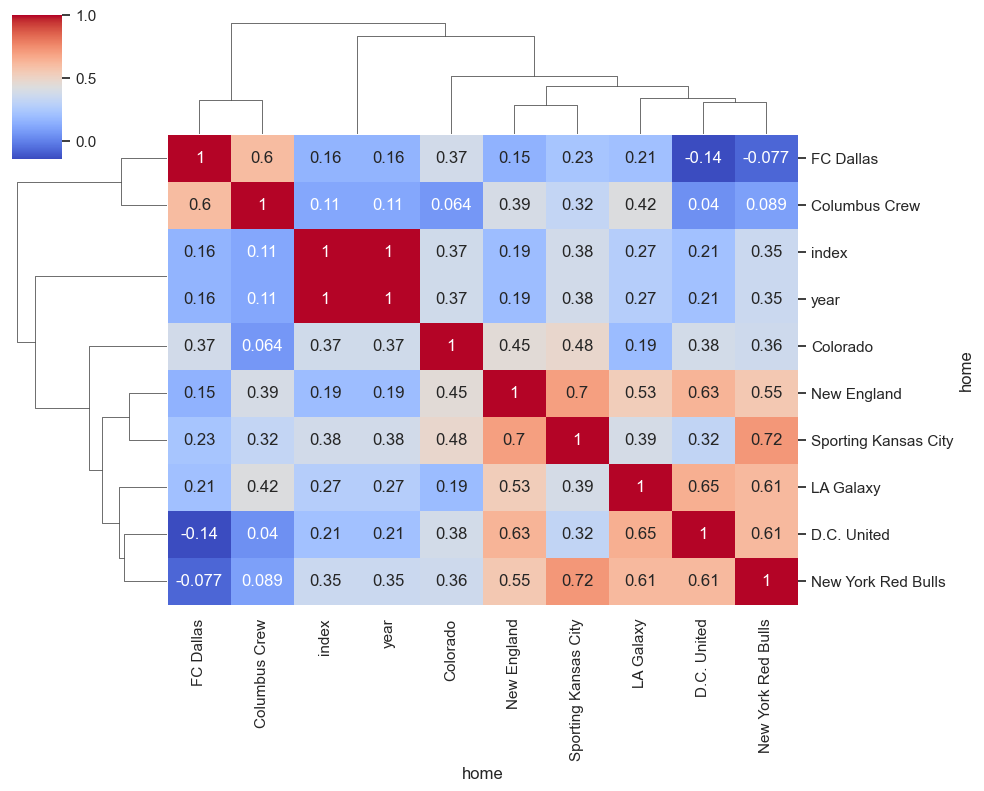

In [1168]:
from scipy.cluster import hierarchy
df_corr = teams_attendance.dropna().corr()
dendrogram = hierarchy.linkage(df_corr, method='ward')
sns.clustermap(df_corr, cmap='coolwarm', annot=True, method='ward', figsize=(10, 8))
plt.show()

/* -----
The below code was written with the aid of ChatGPT;
when prompted 'Combining mean, max and min attendance by year in matches dataset?'
the generated text helped me write the following code:
accessed: Oct 13
 -------- */

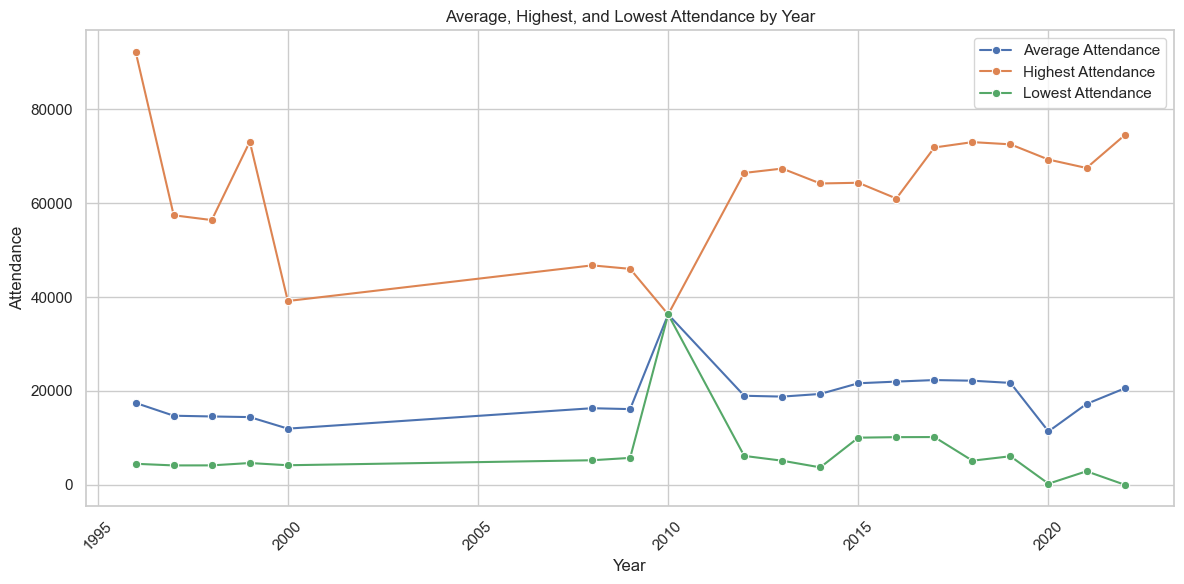

In [1170]:
attendance_summary = df_matches.groupby('year')['attendance'].agg(['mean', 'max', 'min']).reset_index()
attendance_summary.rename(columns={'mean': 'average_attendance', 
                                   'max': 'highest_attendance', 
                                   'min': 'lowest_attendance'}, 
                          inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=attendance_summary, 
             x='year', 
             y='average_attendance', 
             marker='o', 
             label='Average Attendance')
sns.lineplot(data=attendance_summary, 
             x='year', 
             y='highest_attendance', 
             marker='o', 
             label='Highest Attendance')
sns.lineplot(data=attendance_summary, 
             x='year', 
             y='lowest_attendance', 
             marker='o', 
             label='Lowest Attendance')
plt.title('Average, Highest, and Lowest Attendance by Year')
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/* -----
The below code was written with the aid of above code but deleting two years data that were
incorrect. 
 -------- */

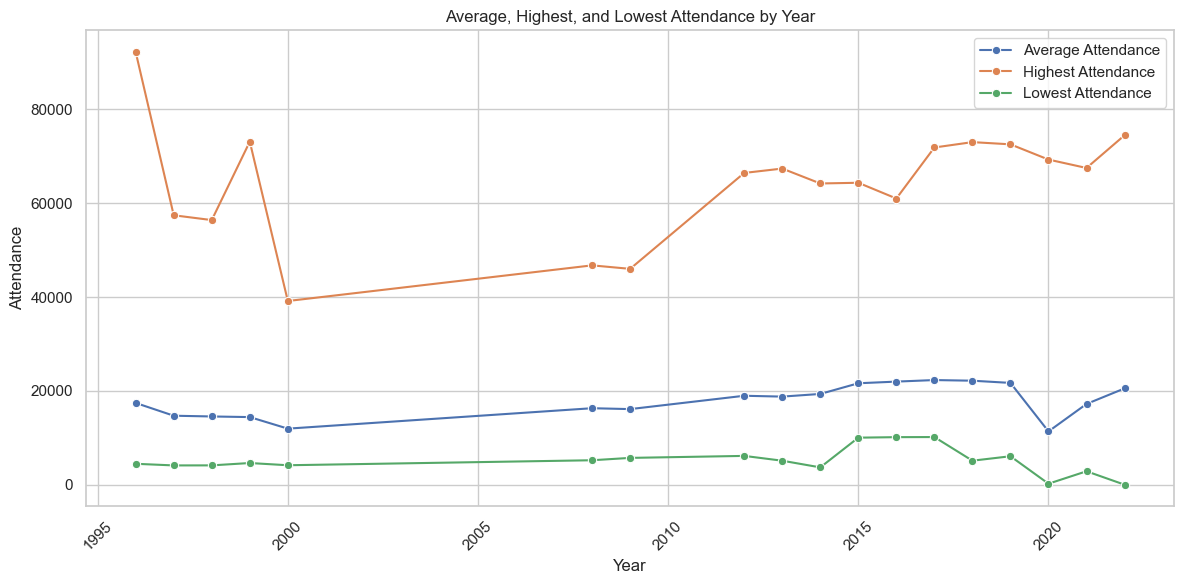

In [1173]:
attendance_summary = df_matches.groupby('year')['attendance'].agg(['mean', 'max', 'min']).reset_index()
attendance_summary.rename(columns={'mean': 'average_attendance', 
                                   'max': 'highest_attendance', 
                                   'min': 'lowest_attendance'}, 
                          inplace=True)
attendance_summary = attendance_summary[~attendance_summary['year'].isin([2010, 2011])]
plt.figure(figsize=(12, 6))
sns.lineplot(data=attendance_summary, 
             x='year', 
             y='average_attendance', 
             marker='o', 
             label='Average Attendance')
sns.lineplot(data=attendance_summary, 
             x='year', 
             y='highest_attendance', 
             marker='o', 
             label='Highest Attendance')
sns.lineplot(data=attendance_summary, 
             x='year', 
             y='lowest_attendance', 
             marker='o', 
             label='Lowest Attendance')
plt.title('Average, Highest, and Lowest Attendance by Year')
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/95/36zb2rc13_51f2jz0fbg4knh0000gn/T/ipykernel_1349/759932439.py:3: UserWarning: 
The palette list has fewer values (20) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=subset_matches, x='year',


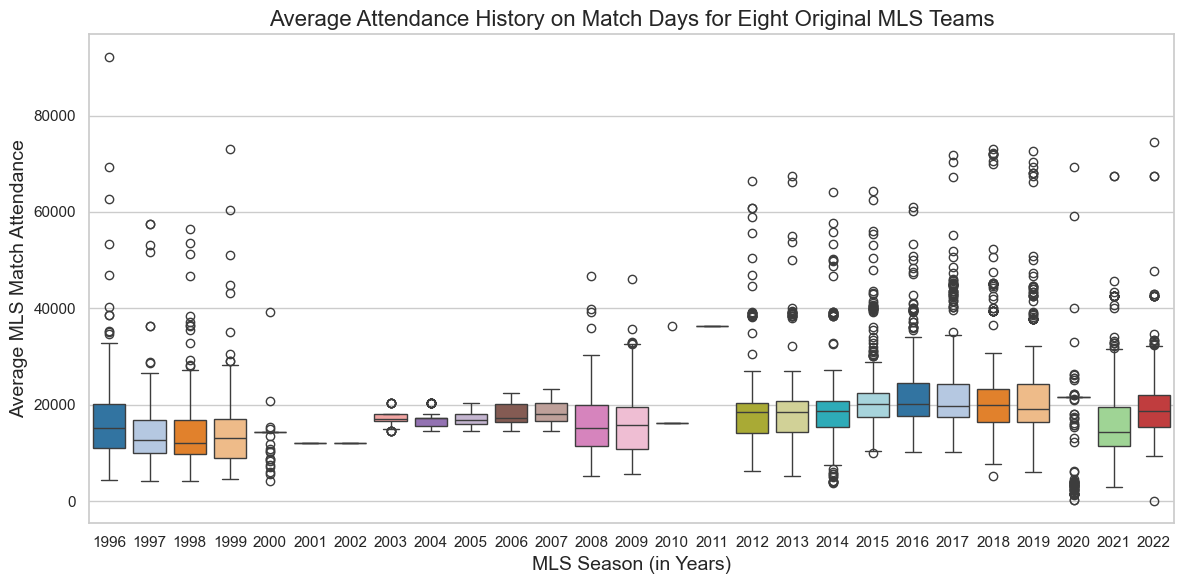

In [1298]:
myColors = sns.color_palette("tab20")
plt.figure(figsize=(12, 6))
sns.boxplot(data=subset_matches, x='year', 
             y='attendance',
            hue = 'year',
            legend = False,
           palette = myColors)
plt.title('Average Attendance History on Match Days for Eight Original MLS Teams', fontsize=16)
plt.xlabel('MLS Season (in Years)', fontsize=14)
plt.ylabel('Average MLS Match Attendance', fontsize=14)
plt.tight_layout()
plt.show()

# Final two visualizations that help answer my initial questions.

/var/folders/95/36zb2rc13_51f2jz0fbg4knh0000gn/T/ipykernel_1349/1714610481.py:7: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.lineplot(data=attendance_long, x='year',


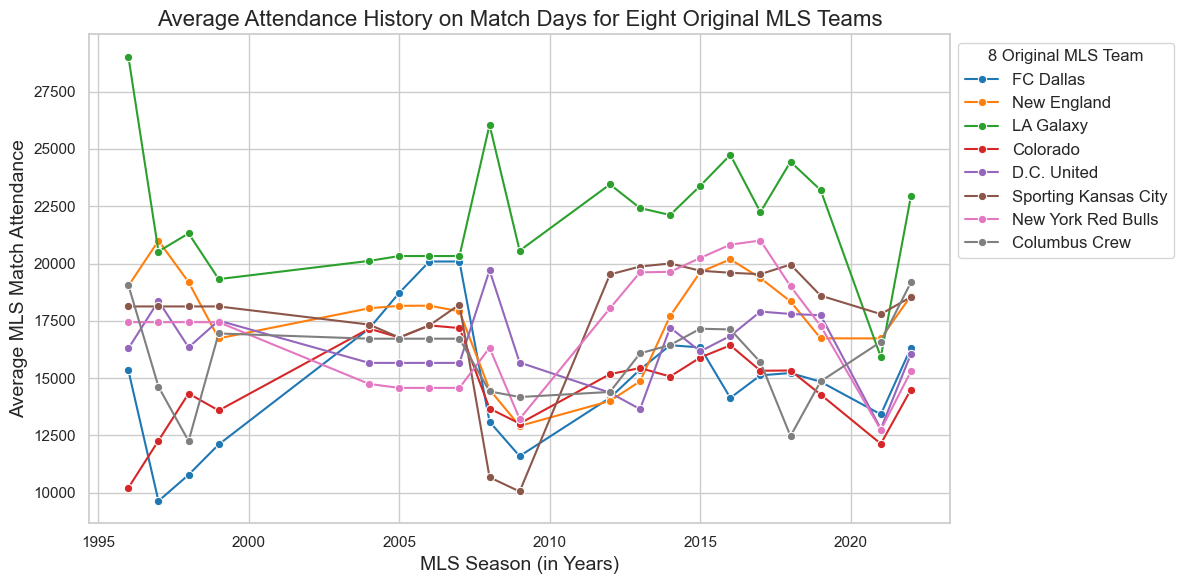

In [1272]:
attendance_long = teams_attendance.melt(id_vars='year', 
                                         value_vars=teams, 
                                         var_name='team', 
                                         value_name='attendance')
myColors = sns.color_palette("tab10")
plt.figure(figsize=(12, 6))
sns.lineplot(data=attendance_long, x='year', 
             y='attendance', hue='team', 
             marker='o', dashes=False, 
             palette= myColors)
plt.title('Average Attendance History on Match Days for Eight Original MLS Teams', fontsize=16)
plt.xlabel('MLS Season (in Years)', fontsize=14)
plt.ylabel('Average MLS Match Attendance', fontsize=14)
plt.legend(title='8 Original MLS Team', loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.tight_layout()
plt.show()

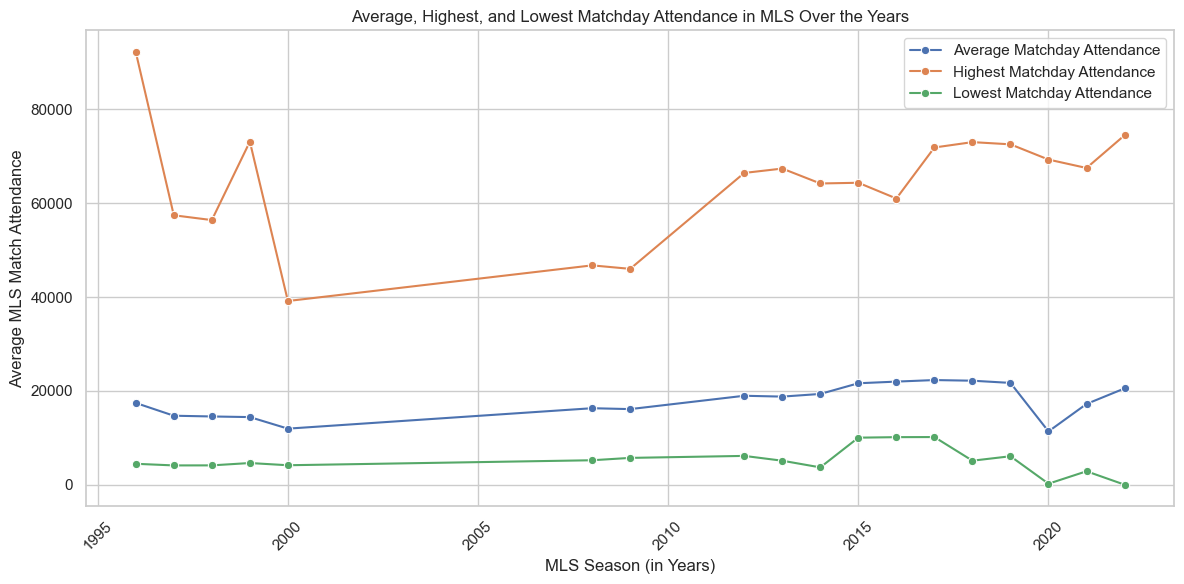

In [1241]:
attendance_summary = df_matches.groupby('year')['attendance'].agg(['mean', 'max', 'min']).reset_index()
attendance_summary.rename(columns={'mean': 'average_attendance', 
                                   'max': 'highest_attendance', 
                                   'min': 'lowest_attendance'}, 
                          inplace=True)
attendance_summary = attendance_summary[~attendance_summary['year'].isin([2010, 2011])]
plt.figure(figsize=(12, 6))
sns.lineplot(data=attendance_summary, 
             x='year', 
             y='average_attendance', 
             marker='o',
             label='Average Matchday Attendance')
sns.lineplot(data=attendance_summary, 
             x='year', 
             y='highest_attendance', 
             marker='o', 
             label='Highest Matchday Attendance')
sns.lineplot(data=attendance_summary, 
             x='year', 
             y='lowest_attendance', 
             marker='o', 
             label='Lowest Matchday Attendance')
plt.title('Average, Highest, and Lowest Matchday Attendance in MLS Over the Years')
plt.xlabel('MLS Season (in Years)')
plt.ylabel('Average MLS Match Attendance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Short Report on the process and visualization


I worked on the Major League Soccer (MLS) dataset. I picked it as I under this domain very well as I'm passionate about soccer and regularly watch European football. When I first saw this dataset, I was excited to explore how MLS has grown in the US over the years. I thought the average attendance each season would be a key factor in understanding this growth. I also wanted to find out which team had the most support based on attendance.

However, I faced several issues with the dataset. Many years had missing attendance data, and some teams had changed their names over time. I needed to make sure the team names were consistent throughout the dataset before I could create any graphs. For the missing attendance values, I used the average from the previous year. Even after that, I still found some null values because there were consecutive years without attendance data. For these remaining null values, I filled them in with the overall average attendance. However that data was not consistent as their were a lot of year attendance was missing. For the final visualization, I had to drop multiple years of data. I also noticed that the attendance data was stored with commas and needed to be converted to integers before calculations.

I created two visualizations to show the results I found. In the first graph, I listed all eight of the original ten teams that have played in every season of the MLS (Having all teams was not ideal as it was too conjusted). This graph shows which teams had the highest average attendance across different seasons. Historically, LA Galaxy has had the most fans attending their home games. I know that a high number of attendees can depend on the capacity of a team’s stadium. If I had data on each team's stadium capacity and ticket demand, I could better assess which team has the strongest fan base. Still, based on the available data, it seems LA Galaxy is one of the most popular MLS teams. Even when I was in Nepal, I often heard about LA Galaxy because they frequently signed well-known players. 

The second graph surprised me. I intended to see how MLS attendance had grown over time, but the data showed that the average attendance has not changed much in almost two decades. It stays around 20,000 fans per game. One reason might be that not many stadiums have increased their capacity, or teams haven't moved to larger venues. It would have helped to know the total capacity of each team’s home stadium and how full they were during games. In Europe, big clubs often fill stadiums with over 70,000 seats, while smaller teams sometimes struggle to fill their 30,000-seat stadiums. It would have been interesting to analyze that, but the data wasn’t available. It would also be useful to know which areas in the US are most passionate about soccer (in terms of location like east coast, south, bay area or other regions?)

Besides total ticket demands and stadium capacities, what other data could help predict the growth of MLS and each team’s fan following? There are discussions about how MLS could soon rank among the top 10 soccer leagues in the world. To achieve that, they need to attract more fans to their games, which would indicate that the quality of MLS matches is improving and can compete with European leagues. Overall it was fun trying to figure it out especially this being one of my first data analysis project of my career. 